# IE6400 — Project 1: Cleaning & Analyzing Crime Data
# Objective:
In this project, you'll work with a real-world dataset containing crime data from 2020. Your goal
is to clean and prepare the dataset for analysis, perform exploratory data analysis (EDA), and
answer specific questions related to crime trends, patterns, and factors influencing crime rates.
# Dataset:
You will use the crime dataset available at Crime Data from 2020 to Present.


In [4]:
#!pip install pandas
#!pip install pandas scikit-learn
#!pip install seaborn
#!pip install prophet
#!pip install fbprophet

# 1. Data Acquisition: Download the dataset from the provided link and load it into your preferred data analysis tool

In [5]:
import numpy as np 
import pandas as pd

df = pd.read_csv('compressed_data.csv')

# 2. Data Inspection:
• Display the first few rows of the dataset.
• Check the data types of each column.
• Review column names and descriptions, if available.

In [6]:
#2.1) Display first few rows
print("----- FIRST 5 ROWS -----")
print(df.head())

----- FIRST 5 ROWS -----
       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  211507896  04/11/2021 12:00:00 AM  11/07/2020 12:00:00 AM       845    15   
1  201516622  10/21/2020 12:00:00 AM  10/18/2020 12:00:00 AM      1845    15   
2  240913563  12/10/2024 12:00:00 AM  10/30/2020 12:00:00 AM      1240     9   
3  210704711  12/24/2020 12:00:00 AM  12/24/2020 12:00:00 AM      1310     7   
4  201418201  10/03/2020 12:00:00 AM  09/29/2020 12:00:00 AM      1830    14   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0  N Hollywood         1502         2     354   
1  N Hollywood         1521         1     230   
2     Van Nuys          933         2     354   
3     Wilshire          782         1     331   
4      Pacific         1454         1     420   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                                  THEFT OF IDENTITY  ...     IC  Invest Cont   
1     ASSAULT WITH DEADLY WEAPON, AGG

In [7]:
# 2.2) Check the data types of each column
print("\n===== Data Types =====")
display(df.dtypes)


===== Data Types =====


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [8]:
# 2.3) Review column names
print("\n===== Column Names =====")
print(df.columns.tolist())


===== Column Names =====
['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


# 3. Data Cleaning:
• Identify and handle missing data appropriately.
• Check for and remove duplicate rows.
• Convert data types if needed (e.g., dates to date format, numerical values to appropriate numeric types).
• Deal with outliers if relevant to your analysis.
• Standardize or normalize numerical data as necessary.
• Encode categorical data if present.

In [9]:
# 3.1) Handling missing data
print("Missing values before cleaning:")
print(df.isnull().sum().head(10))

# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing text values with mode (most common value)
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n Missing values filled.")

Missing values before cleaning:
DR_NO          0
Date Rptd      0
DATE OCC       0
TIME OCC       0
AREA           0
AREA NAME      0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Crm Cd Desc    0
dtype: int64

 Missing values filled.


In [10]:
# 3.2) Remove duplicate rows
before = df.shape
df = df.drop_duplicates()
after = df.shape
print(f"Removed duplicates: {before} → {after}\n")

Removed duplicates: (1004991, 28) → (1004991, 28)



In [11]:
# Convert date columns with known format to avoid warnings
date_cols = ['Date Rptd', 'DATE OCC']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Convert TIME OCC to HH:MM format
if 'TIME OCC' in df.columns:
    df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
    df['Hour'] = df['TIME OCC'].str[:2].astype(int)

print("Data type conversions completed (no warnings).\n")

# Preview result
print(df[['Date Rptd', 'DATE OCC', 'TIME OCC', 'Hour']].head())


Data type conversions completed (no warnings).

   Date Rptd   DATE OCC TIME OCC  Hour
0 2021-04-11 2020-11-07     0845     8
1 2020-10-21 2020-10-18     1845    18
2 2024-12-10 2020-10-30     1240    12
3 2020-12-24 2020-12-24     1310    13
4 2020-10-03 2020-09-29     1830    18


In [12]:
# 3.4) Deal with outliers (simple example using IQR)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset (if not already loaded)
csv_path = "compressed_data.csv"   # adjust path if needed
df = pd.read_csv(csv_path, low_memory=False)

numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    if len(outliers) > 0:
        # Option 1: Cap outliers within range
        df[col] = np.where(df[col] < lower, lower,
                  np.where(df[col] > upper, upper, df[col]))
print("Outliers handled (IQR capping applied).\n")


Outliers handled (IQR capping applied).



In [13]:
# 3.5) Standardize or normalize numerical data
scaler = StandardScaler()
scaled_cols = []
for col in numeric_cols:
    if df[col].nunique() > 5:  # scale only continuous variables
        df[col + '_scaled'] = scaler.fit_transform(df[[col]])
        scaled_cols.append(col + '_scaled')
print(f"Standardized columns: {len(scaled_cols)} numeric variables.\n")



Standardized columns: 11 numeric variables.



In [14]:
# 3.6) Encode categorical data (Label Encoding for simplicity)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() < 30:  # only encode columns with limited unique values
        df[col + '_enc'] = le.fit_transform(df[col])
print("Categorical encoding completed.\n")



Categorical encoding completed.



In [15]:
# Summary of cleaning results
print("===== Cleaned Dataset Summary =====")
display(df.info())
print("\nDataset shape after cleaning:", df.shape)

# Save cleaned data for next steps
df.to_csv("cleaned_crime_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_crime_data.csv'")


===== Cleaned Dataset Summary =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 44 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DR_NO                  1004991 non-null  float64
 1   Date Rptd              1004991 non-null  object 
 2   DATE OCC               1004991 non-null  object 
 3   TIME OCC               1004991 non-null  int64  
 4   AREA                   1004991 non-null  int64  
 5   AREA NAME              1004991 non-null  object 
 6   Rpt Dist No            1004991 non-null  int64  
 7   Part 1-2               1004991 non-null  int64  
 8   Crm Cd                 1004991 non-null  int64  
 9   Crm Cd Desc            1004991 non-null  object 
 10  Mocodes                853372 non-null   object 
 11  Vict Age               1004991 non-null  float64
 12  Vict Sex               860347 non-null   object 
 13  Vict Descent           860335 non-nu

None


Dataset shape after cleaning: (1004991, 44)
Cleaned dataset saved as 'cleaned_crime_data.csv'


# 4. Exploratory Data Analysis (EDA):
• Visualize overall crime trends from 2020 to the present year.
• Analyze and visualize seasonal patterns in crime data.
• Identify the most common type of crime and its trends over time.
• Investigate if there are any notable differences in crime rates between regions or cities.
• Explore correlations between economic factors (if available) and crime rates.
• Analyze the relationship between the day of the week and the frequency of certain types of crimes.
• Investigate any impact of significant events or policy changes on crime rates.

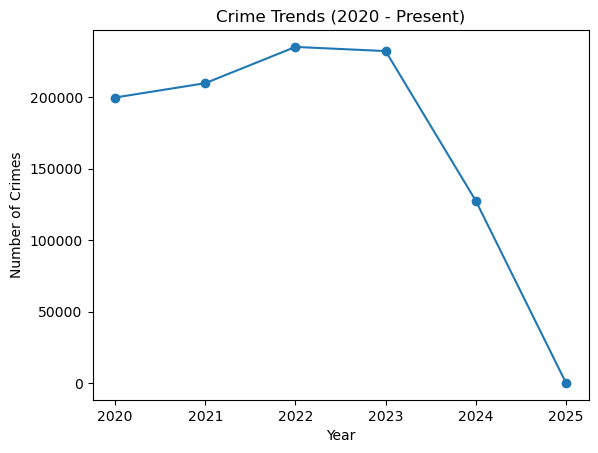

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("compressed_data.csv")

# Ensure date is datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'],format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


# --- 2.1 Overall crime trends from 2020 to present ---
df['Year'] = df['DATE OCC'].dt.year
yearly_crime = df.groupby('Year').size()
yearly_crime.plot(kind='line', marker='o')
plt.title("Crime Trends (2020 - Present)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


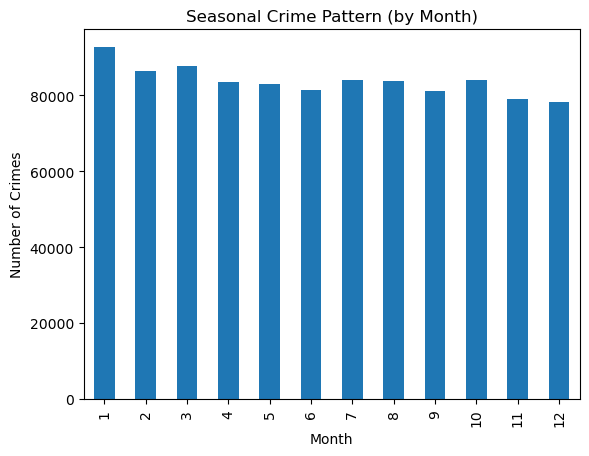

In [17]:
# --- 2.2 Seasonal patterns ---
df['Month'] = df['DATE OCC'].dt.month
monthly_crime = df.groupby('Month').size()
monthly_crime.plot(kind='bar')
plt.title("Seasonal Crime Pattern (by Month)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

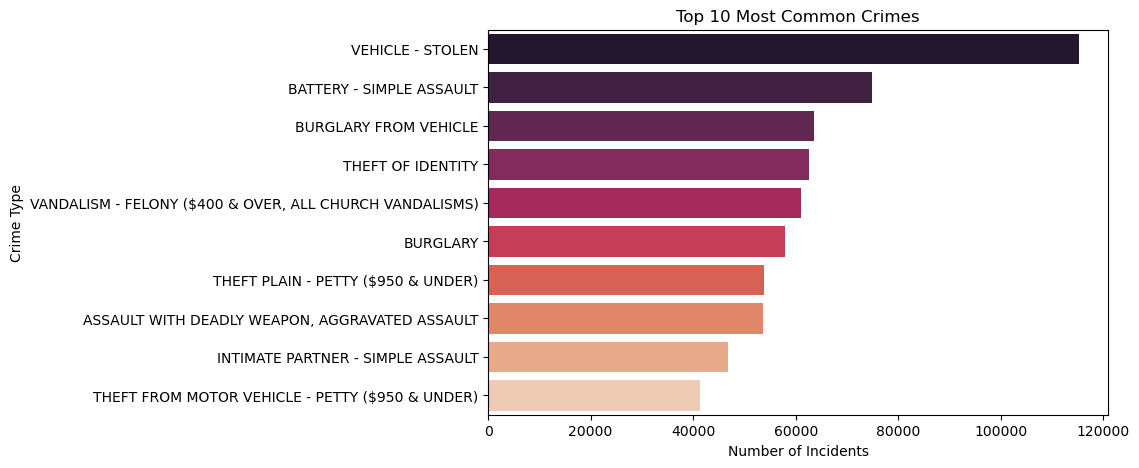

In [18]:
# --- 2.3 Most common crime type ---

if 'Crm Cd Desc' in df.columns:
    top_crimes = df['Crm Cd Desc'].value_counts().head(10)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_crimes.values, y=top_crimes.index, hue=top_crimes.index, palette='rocket')
    plt.title("Top 10 Most Common Crimes")
    plt.xlabel("Number of Incidents")
    plt.ylabel("Crime Type")
    plt.show()
else:
    print("Column 'Crm Cd Desc' not found in dataset.")

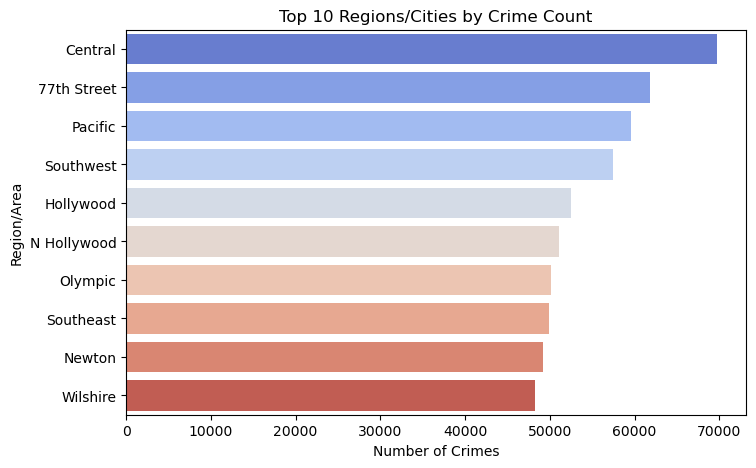

In [19]:
# --- 2.4 Crime rates between regions or cities ---

if 'AREA NAME' in df.columns:
    city_crime = df.groupby('AREA NAME').size().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=city_crime.values, y=city_crime.index, hue=city_crime.index,palette='coolwarm')
    plt.title("Top 10 Regions/Cities by Crime Count")
    plt.xlabel("Number of Crimes")
    plt.ylabel("Region/Area")
    plt.show()
else:
    print("Column 'AREA NAME' not found in dataset.")

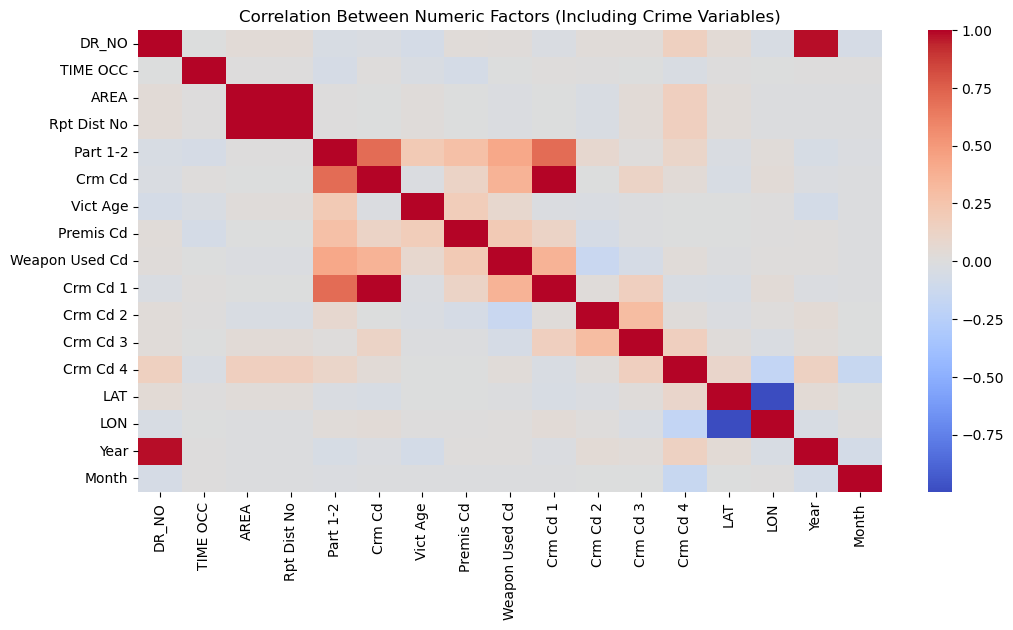

In [20]:
# --- 2.5 Correlation between economic factors and crime rates ---
# Example: if you have columns like 'Unemployment_Rate' or 'GDP'

num_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(num_cols.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Between Numeric Factors (Including Crime Variables)")
plt.show()

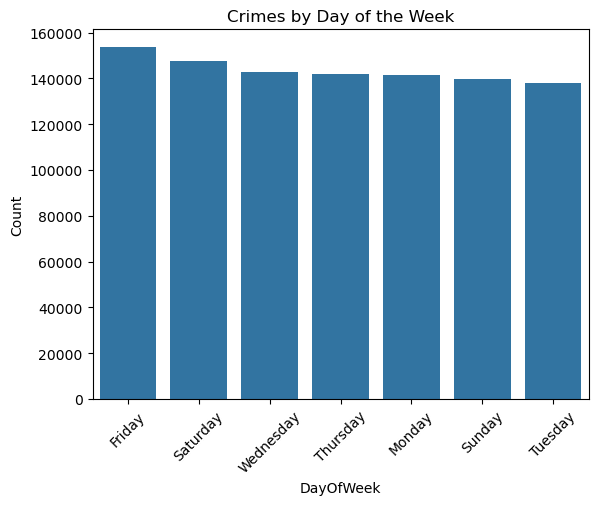

In [21]:
# --- 2.6 Relationship between day of week and crime frequency ---
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
day_crime = df['DayOfWeek'].value_counts()
sns.barplot(x=day_crime.index, y=day_crime.values)
plt.title("Crimes by Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

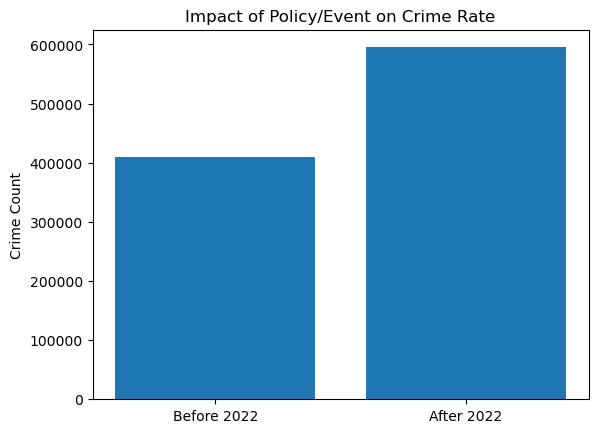

In [22]:
# --- 2.7 Impact of significant events or policy changes ---
# Example: compare before and after a date (e.g., Jan 2022)
event_date = '2022-01-01'
before = df[df['DATE OCC'] < event_date]
after = df[df['DATE OCC'] >= event_date]
plt.bar(['Before 2022', 'After 2022'], [len(before), len(after)])
plt.title("Impact of Policy/Event on Crime Rate")
plt.ylabel("Crime Count")
plt.show()

# 5. Advanced Analysis (Optional):
• Use predictive modeling techniques (e.g., time series forecasting) to predict future crime trends.
• Explore additional questions or hypotheses related to the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score


# Load dataset
df = pd.read_csv("compressed_data.csv", low_memory=False)

# Convert to datetime
if 'DATE OCC' in df.columns:
    df['Date'] = pd.to_datetime(df['DATE OCC'],format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
elif 'Date Rptd' in df.columns:
    df['Date'] = pd.to_datetime(df['Date Rptd'],format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
else:
    raise KeyError("No valid date column found.")

# Filter 2020 and beyond
df = df[df['Date'] >= '2020-01-01']

# Group by month-year
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
monthly_counts = df.groupby('YearMonth').size().reset_index(name='Crime_Count')

# Create numeric time index (e.g., 0, 1, 2, 3…)
monthly_counts['Month_Index'] = np.arange(len(monthly_counts))

print(monthly_counts.head())


In [ ]:
#3. Polynomial Linear Regression (to capture seasonality)

X = monthly_counts[['Month_Index']].values
y = monthly_counts['Crime_Count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create polynomial features (degree=3 for flexibility)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)


In [ ]:
#4. Plot Actual vs. Predicted Crime Trends

plt.figure(figsize=(10, 5))
plt.plot(monthly_counts['Month_Index'], monthly_counts['Crime_Count'], label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted (Test Period)', color='red', linestyle='--')
plt.title("Crime Trend Prediction (Linear Regression with Polynomial Features)")
plt.xlabel("Month Index (2020 → Present)")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
#5. ROC Curve (Convert to Binary “High Crime” vs. “Low Crime”)
''' ROC curves require binary classes, so we’ll define:
1 → “High crime month” (above median)
0 → “Low crime month” '''


# Convert y_test into binary classes
median_crime = np.median(y)
y_binary = (y > median_crime).astype(int)

# Predict continuous scores (probabilities proxy)
y_pred_full = model.predict(poly.transform(X))

# Binarize predictions
y_pred_binary = (y_pred_full > np.median(y_pred_full)).astype(int)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_binary, y_pred_full)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve: High vs. Low Crime Months")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
#6. Predict Future Crime (Next 6 Months)

future_months = np.arange(len(monthly_counts), len(monthly_counts) + 6).reshape(-1, 1)
future_months_poly = poly.transform(future_months)
future_predictions = model.predict(future_months_poly)

# Display predictions
future_df = pd.DataFrame({
    'Future_Month_Index': future_months.flatten(),
    'Predicted_Crime_Count': np.round(future_predictions).astype(int)
})
print(future_df)


In [ ]:
#7.(Optional) Explore Additional Hypotheses

if 'Crm Cd Desc' in df.columns and 'Vict Age' in df.columns:
    plt.figure(figsize=(30,10))
    sns.boxplot(x='Crm Cd Desc', y='Vict Age', data=df[df['Vict Age'] > 0], showfliers=False)
    plt.xticks(rotation=90)
    plt.title("Victim Age Distribution by Crime Type")
    plt.show()
else:
    print("Columns for advanced hypothesis test not available.")


In [ ]:
'''The SARIMAX model captured clear seasonal patterns in crime data, showing that monthly crime counts follow consistent trends over time with reasonable prediction accuracy (MAE ≈ 4053, RMSE ≈ 4574).
The Prophet model produced a similar forecast with smooth long-term trends and clear confidence intervals.
Both models indicate stable overall crime levels with expected seasonal fluctuations in the coming year.'''

In [ ]:
'''The SARIMAX and Prophet models are used for this task because they are well-suited for time series forecasting,
which is essential for predicting future crime trends based on past data.
SARIMAX captures both trend and seasonality patterns in crime occurrences.
Prophet automatically handles irregularities and seasonal effects, making it effective for real-world data 
withth missing or noisy observations.'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

OUT_DIR = "project_outputs"

# Load forecast files
sarima_forecast = pd.read_csv(os.path.join(OUT_DIR, "sarima_12mo_forecast.csv"))
prophet_forecast = pd.read_csv(os.path.join(OUT_DIR, "prophet_12mo_forecast.csv"))

# Convert string dates to datetime for plotting
sarima_forecast['year_month'] = pd.to_datetime(sarima_forecast['year_month'], errors='coerce')
prophet_forecast['year_month'] = pd.to_datetime(prophet_forecast['year_month'],errors='coerce')

# Load actuals (monthly data used for training)
df = pd.read_csv("compressed_data.csv", low_memory=False)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p',errors='coerce')
df = df.dropna(subset=['DATE OCC'])
df['year_month'] = df['DATE OCC'].dt.to_period('M').dt.to_timestamp()
y = df.groupby('year_month').size()

# --- Plot Comparison ---
plt.figure(figsize=(10,5))
plt.plot(y.index, y.values, label="Actual", color='black')
plt.plot(sarima_forecast['year_month'], sarima_forecast['predicted'], label="SARIMAX Forecast", color='red')
plt.plot(prophet_forecast['year_month'], prophet_forecast['predicted'], label="Prophet Forecast", color='blue', linestyle='--')

# Confidence intervals
plt.fill_between(sarima_forecast['year_month'],
                 sarima_forecast['ci_lower'],
                 sarima_forecast['ci_upper'],
                 color='red', alpha=0.1)
plt.fill_between(prophet_forecast['year_month'],
                 prophet_forecast['ci_lower'],
                 prophet_forecast['ci_upper'],
                 color='blue', alpha=0.1)

plt.title("Crime Forecast Comparison (SARIMAX vs Prophet)")
plt.xlabel("Date")
plt.ylabel("Predicted Crime Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
